In [48]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report

from keras.optimizers import Adam
from keras.models import Sequential
from keras.applications import ResNet50
from keras.applications import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.applications.mobilenet_v2 import preprocess_input
from keras.layers import GlobalAveragePooling2D, Dense, Dropout


Loading Images to Array

In [54]:
def load_images_to_array(folder_path):
    image_list = []
    
    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            try:
                
                image_path = os.path.join(folder_path, filename)
                with Image.open(image_path) as img:
                    # image to  NumPy array
                    img_array = np.array(img)
                    
                    image_list.append(img_array)
                    print(f"Loaded: {filename}")
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    
    return image_list

if __name__ == "__main__":
    folder_path = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces_resized_lit'
    # folder_path = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst_faces_resized_lit'
    images_as_arrays = load_images_to_array(folder_path)

Loaded: 10_well_lit_PXL_20220922_175138290.jpg
Loaded: 10_well_lit_PXL_20220922_175140560.jpg
Loaded: 10_well_lit_PXL_20220922_175142212.jpg
Loaded: 10_well_lit_PXL_20220922_175145715.jpg
Loaded: 10_well_lit_PXL_20220922_175149121.jpg
Loaded: 10_well_lit_PXL_20220922_175151358.jpg
Loaded: 10_well_lit_PXL_20220922_175152817.jpg
Loaded: 10_well_lit_PXL_20220922_175154352.jpg
Loaded: 10_well_lit_PXL_20220922_175155744.jpg
Loaded: 10_well_lit_PXL_20220922_175157945.jpg
Loaded: 10_well_lit_PXL_20220922_175159465.jpg
Loaded: 10_well_lit_PXL_20220922_175201134.jpg
Loaded: 10_well_lit_PXL_20220922_175203683.jpg
Loaded: 10_well_lit_PXL_20220922_175205602.jpg
Loaded: 10_well_lit_PXL_20220922_175210525.jpg
Loaded: 10_well_lit_PXL_20220922_175212910.jpg
Loaded: 10_well_lit_PXL_20220922_175213980.jpg
Loaded: 10_well_lit_PXL_20220922_175216751.jpg
Loaded: 10_well_lit_PXL_20220922_175218550.jpg
Loaded: 10_well_lit_PXL_20220922_175222824.jpg
Loaded: 10_well_lit_PXL_20220922_175223698.jpg
Loaded: 10_we

Loading Images to Array (DATA AUGMENTATION)

In [53]:
def load_images_to_array(folder_path, augment=False):
    image_list = []
    
    # Parameters for data augmentation
    if augment:
        datagen = ImageDataGenerator(
            rotation_range=20,      
            width_shift_range=0.1,  
            height_shift_range=0.1, 
            shear_range=0.2,        
            zoom_range=0.2,         
            horizontal_flip=True,   
            vertical_flip=False,  
            fill_mode='nearest'     
        )
    
    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            try:
                image_path = os.path.join(folder_path, filename)
                with Image.open(image_path) as img:
                    img_array = np.array(img)
                    # Apply data augmentation if specified
                    if augment:
                        img = img.convert('RGB') 
                        img = img.resize((224, 224)) 
                        img_array = img_array.reshape((1,) + img_array.shape) 
                        for batch in datagen.flow(img_array, batch_size=1):
                            augmented_img_array = batch[0]             
                            image_list.append(augmented_img_array) 
                            if len(image_list) % 2 == 0:  # Sets the number of augmented images it will produce
                                break 
                    else:
                        # No data augmentation, just load the image
                        image_list.append(img_array)
                    print(f"Loaded: {filename}")
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    
    return image_list

# Set folder path
folder_path = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces_resized_lit'
save_folder_path = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces_resized_lit_augmented'

# Load images with data augmentation
images_as_arrays_augmented = load_images_to_array(folder_path, augment=True)
print(len(images_as_arrays_augmented))


Loaded: 10_well_lit_PXL_20220922_175138290.jpg
Loaded: 10_well_lit_PXL_20220922_175140560.jpg
Loaded: 10_well_lit_PXL_20220922_175142212.jpg
Loaded: 10_well_lit_PXL_20220922_175145715.jpg
Loaded: 10_well_lit_PXL_20220922_175149121.jpg
Loaded: 10_well_lit_PXL_20220922_175151358.jpg
Loaded: 10_well_lit_PXL_20220922_175152817.jpg
Loaded: 10_well_lit_PXL_20220922_175154352.jpg
Loaded: 10_well_lit_PXL_20220922_175155744.jpg
Loaded: 10_well_lit_PXL_20220922_175157945.jpg
Loaded: 10_well_lit_PXL_20220922_175159465.jpg
Loaded: 10_well_lit_PXL_20220922_175201134.jpg
Loaded: 10_well_lit_PXL_20220922_175203683.jpg
Loaded: 10_well_lit_PXL_20220922_175205602.jpg
Loaded: 10_well_lit_PXL_20220922_175210525.jpg
Loaded: 10_well_lit_PXL_20220922_175212910.jpg
Loaded: 10_well_lit_PXL_20220922_175213980.jpg
Loaded: 10_well_lit_PXL_20220922_175216751.jpg
Loaded: 10_well_lit_PXL_20220922_175218550.jpg
Loaded: 10_well_lit_PXL_20220922_175222824.jpg
Loaded: 10_well_lit_PXL_20220922_175223698.jpg
Loaded: 10_we

Making Array of Labels (Augmentation Considered)

In [56]:
folder_path = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces_resized_lit'
# folder_path = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst_faces_resized_lit'

labels = []

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):

        # Extracting the label 
        label = filename.split('_')[0]

        # # This peice of code if data is augmented
        # if label.isdigit():
        #     # If the label is numeric, it's an augmented image
        #     labels.extend([int(label)] * 2)  # Assuming 10 augmented images per original image
        # else:
        # #Peice of code ends here. Fix spacing if this piece is deleted

        labels.append(int(label))

labels = np.array(labels, dtype=np.int32)

# range 0-9
labels = labels - 1

print(f"Length of labels array: {len(labels)}")
print("Extracted Labels:", labels)

Length of labels array: 606
Extracted Labels: [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6

Normalizing Picture Array

In [60]:
# (0->255 converted to -1->1)

images_as_arrays_normalized = [preprocess_input(image) for image in images_as_arrays]

#Length of array (number of images)
print(f"length of image array: {len(images_as_arrays_normalized)}")

length of image array: 606


In [61]:
# Assigning Variables 

# dataset_path = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces_resized'
dataset_path = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst_faces_resized'
input_shape = (224, 224, 3)
classes = ['MST 1', 'MST 2', 'MST 3', 'MST 4', 'MST 5', 'MST 6', 'MST 7', 'MST 8', 'MST 9', 'MST 10']

epochs = 120  
batch_size = 32

Data Splitting (Train and Test)

In [62]:
# (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(images_as_arrays_normalized, labels, test_size=0.2, random_state=69)

# (50% temp, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to NumPy arrays 
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print(f"X train Shape: {X_train.shape}")
print(f"y train Shape: {y_train.shape}\n")
print(f"X val Shape: {X_val.shape}")
print(f"y val Shape: {y_val.shape}\n")
print(f"X test Shape: {X_test.shape}")
print(f"y test Shape: {y_test.shape}")

X train Shape: (484, 224, 224, 3)
y train Shape: (484,)

X val Shape: (61, 224, 224, 3)
y val Shape: (61,)

X test Shape: (61, 224, 224, 3)
y test Shape: (61,)


In [68]:
base_model = MobileNetV2(input_shape=input_shape, 
                         include_top=False, 
                         weights='imagenet') #top layer exlcuded
base_model.trainable = False #Freezes the Layers (Weights won't get updated)

In [69]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer=Adam(lr=1e-4), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

c:\Users\Danial1\.conda\envs\MyFirstEnv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Adding Callbacks

In [65]:
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6) #Reduces learning rate when no improvment in validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  #Stops when we see no improvement

In [70]:
history = model.fit(X_train, 
                    y_train, 
                    validation_data=(X_val, y_val), 
                    epochs= epochs, 
                    batch_size= batch_size,
                    callbacks=[lr_scheduler, early_stopping]
                    )

test_loss, test_accuracy = model.evaluate(X_test, y_test)

Epoch 1/120
16/16 [==============================] - 8s 310ms/step - loss: 2.5714 - accuracy: 0.1405 - val_loss: 2.1222 - val_accuracy: 0.2951 - lr: 1.0000e-04
Epoch 2/120
16/16 [==============================] - 4s 255ms/step - loss: 2.0455 - accuracy: 0.2748 - val_loss: 1.8749 - val_accuracy: 0.4426 - lr: 1.0000e-04
Epoch 3/120
16/16 [==============================] - 4s 260ms/step - loss: 1.8418 - accuracy: 0.3822 - val_loss: 1.6522 - val_accuracy: 0.5410 - lr: 1.0000e-04
Epoch 4/120
16/16 [==============================] - 4s 237ms/step - loss: 1.6457 - accuracy: 0.4401 - val_loss: 1.4777 - val_accuracy: 0.6066 - lr: 1.0000e-04
Epoch 5/120
16/16 [==============================] - 4s 235ms/step - loss: 1.4544 - accuracy: 0.5310 - val_loss: 1.3232 - val_accuracy: 0.6393 - lr: 1.0000e-04
Epoch 6/120
16/16 [==============================] - 4s 230ms/step - loss: 1.2933 - accuracy: 0.5868 - val_loss: 1.1925 - val_accuracy: 0.7377 - lr: 1.0000e-04
Epoch 7/120
16/16 [=====================

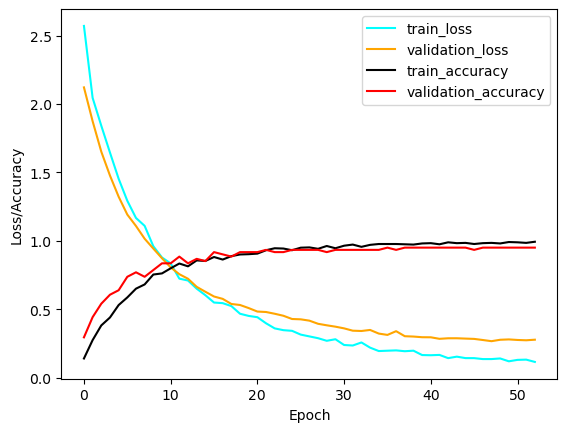

Test Accuracy: 0.868852436542511
Test Loss: 0.4086136221885681


In [71]:
plt.plot(history.history['loss'], label='train_loss', color = 'Cyan')
plt.plot(history.history['val_loss'], label='validation_loss', color = 'Orange')
plt.plot(history.history['accuracy'], label='train_accuracy', color = 'black')
plt.plot(history.history['val_accuracy'], label='validation_accuracy', color = 'red')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.show()

model_save_path = 'E:\\University\\FYP Stuff\\Models For SkinTone Recognition\\Skintone_Recognition_lit.h5'
# model_save_path = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\SkinTone_Recognition_lit.h5'
model.save(model_save_path)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

In [72]:
preds = model.predict(X_test)
y_pred = np.argmax(preds, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=classes))

2/2 [==============================] - 1s 184ms/step
Classification Report:
              precision    recall  f1-score   support

       MST 1       1.00      1.00      1.00         5
       MST 2       0.73      1.00      0.84         8
       MST 3       1.00      0.57      0.73         7
       MST 4       1.00      0.86      0.92         7
       MST 5       0.88      0.78      0.82         9
       MST 6       0.67      1.00      0.80         4
       MST 7       1.00      0.60      0.75         5
       MST 8       0.86      1.00      0.92         6
       MST 9       0.83      1.00      0.91         5
      MST 10       1.00      1.00      1.00         5

    accuracy                           0.87        61
   macro avg       0.90      0.88      0.87        61
weighted avg       0.90      0.87      0.86        61



In [73]:
print('success')

success
